In [6]:
import numpy as np
import scipy
from scipy.stats import norm, entropy
from matplotlib import pyplot as plt

## 信息论

In [4]:
# KL function
def kl(p, q):
    """
    D(P || Q) = sum(p(x) * log(p(x) / q(x)))
    """
    p = np.asarray(p, dtype=np.float64)
    q = np.asarray(q, dtype=np.float64)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [5]:
# test
p = [0.1, 0.2, 0.7]
q = [0.1, 0.2, 0.7]
print(kl(p, q) == entropy(p, q))

True


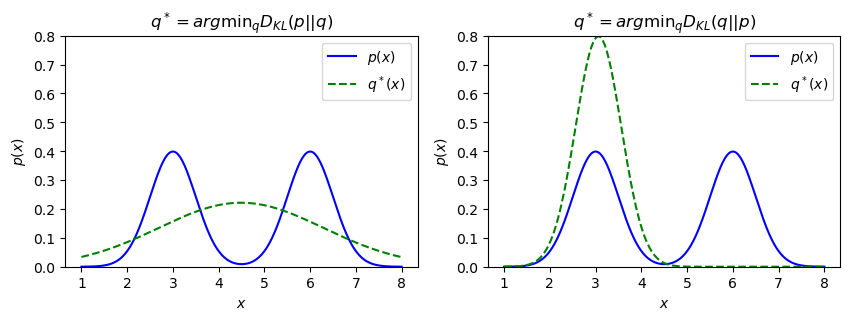

In [9]:
# compare D(P || Q) and D(Q || P)
# D(P || Q) 表示的是当我们用概率分布Q来拟合概率分布P时KL散度的值，亦即P的信息量相对于Q的信息量增加的“额外信息量”（注意：x ~ P）
# KL散度的不对称性
x = np.linspace(1, 8, 500)
y1 = norm.pdf(x, 3, 0.5)
y2 = norm.pdf(x, 6, 0.5)
p = y1 + y2  # construct P(x)
KL_pq, KL_qp = [], []
q_list = []

for mu in np.linspace(0, 10, 50):
    for sigma in np.linspace(0.1, 5, 50):
        q = norm.pdf(x, mu, sigma)
        q_list.append(q)
        KL_pq.append(entropy(p, q))
        KL_qp.append(entropy(q, p))
KL_pq_min = np.argmin(KL_pq)
KL_qp_min = np.argmin(KL_qp)

# visualize fitting results
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].set_ylim(0, 0.8)
axes[0].plot(x, p/2, 'b', label='$p(x)$')  # p/2只是为了更好看的展示拟合的效果
axes[0].plot(x, q_list[KL_pq_min], 'g--', label='$q^*(x)$')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$p(x)$')
axes[0].set_title('$q^*={arg\min}_q D_{KL}(p||q)$')
axes[1].set_ylim(0, 0.8)
axes[1].plot(x, p/2, 'b', label='$p(x)$')
axes[1].plot(x, q_list[KL_qp_min], 'g--', label='$q^*(x)$')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_title('$q^*={arg\min}_q D_{KL}(q||p)$')
for ax in axes:
    ax.legend(loc='upper right')